In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter
from google.colab import files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### NGAFID mse value and Significant test

In [92]:
## mannwhitneyu is for independent smaple
#from scipy.stats import mannwhitneyu
## We use the same sample with different model. So we have to do the paired sample test.
#wilcoxon is for paired sample test here.

from scipy.stats import wilcoxon

In [119]:
#data preprocessing
def csv_to_df(target_model, starting_index):
  
  final_dict = {}
  for i in range(1,5):
    path = "/content/drive/MyDrive/NGAFID_file/myfile_f_"+ target_model + '_' + str(i) + ".csv"
    cnn_faulty = pd.read_csv(path)
    tm = target_model + "_" + str(i)
    final_dict[tm] = {}
    for j in range(30):
      final_dict[tm][j] = list(cnn_faulty.index[j][starting_index:])
    

  return final_dict

In [143]:
#convert the dataset to dataframe
acnn = csv_to_df('cnn', 0)

In [ ]:
#save all the files
for i in acnn.keys():
  cnn = pd.DataFrame(acnn[i])
  target = "cnn_" + str(i) + ".csv" 
  cnn.to_csv(target)
  files.download(target)

In [145]:
#convert the dataset to dataframe
arnn = csv_to_df('rnn', 0)

In [ ]:
for i in arnn.keys():
  rnn = pd.DataFrame(arnn[i])
  target = "rnn_" + str(i) + ".csv" 
  rnn.to_csv(target)
  files.download(target)

In [109]:
def get_average_list(target_model, starting_index):
  
  final_list = []
  for i in range(1,5):
    path = "/content/drive/MyDrive/NGAFID_file/myfile_f_"+ target_model + '_' + str(i) + ".csv"
    cnn_faulty = pd.read_csv(path)
    temp_list = []
    for j in range(30):
      temp_list.append(np.average(list(cnn_faulty.index[j][starting_index:])))
    final_list.append(temp_list)

  return final_list

In [110]:
CNN_list = get_average_list('cnn', 120)

In [112]:
RNN_list = get_average_list('rnn', 120)

In [115]:
#This is the example of Mann U test. It is not suitable here.
print('CNN_0', np.mean(np.asarray(CNN_list[0])))
for i in range(1,len(CNN_list)):
    result = mannwhitneyu(np.asarray(CNN_list[0]), np.asarray(CNN_list[i]))
    print(str(i), ':' , result)
    print('CNN_' + str(i), ':', np.mean(np.asarray(CNN_list[i])))

print('---------------------------------------')

print('RNN_0', np.mean(np.asarray(RNN_list[0])))
for i in range(1,len(RNN_list)):
    result = mannwhitneyu(np.asarray(RNN_list[0]), np.asarray(RNN_list[i]))
    print(str(i), ':' , result)
    print('RNN_' + str(i), ':', np.mean(np.asarray(RNN_list[i])))

CNN_0 0.27067738883825376
1 : MannwhitneyuResult(statistic=14.0, pvalue=6.028339503179921e-11)
CNN_1 : 0.25282502288110054
2 : MannwhitneyuResult(statistic=128.0, pvalue=1.0011463507646893e-06)
CNN_2 : 0.25835623461833884
3 : MannwhitneyuResult(statistic=180.0, pvalue=3.3825041231857496e-05)
CNN_3 : 0.26209775246513795
---------------------------------------
RNN_0 0.2562542187588322
1 : MannwhitneyuResult(statistic=323.0, pvalue=0.030725955505628493)
RNN_1 : 0.23756517494588136
2 : MannwhitneyuResult(statistic=77.0, pvalue=1.8229457462531186e-08)
RNN_2 : 0.180351128462327
3 : MannwhitneyuResult(statistic=23.0, pvalue=1.4357923871490578e-10)
RNN_3 : 0.1710686120088885


In [155]:
print('CNN_1',':', np.mean(np.asarray(CNN_list[0])))
for i in range(1,len(CNN_list)):
    result = wilcoxon(np.asarray(CNN_list[0]), np.asarray(CNN_list[i]))
    print(str(i+1), ':' , result)
    print('CNN_' + str(i+1), ':', np.mean(np.asarray(CNN_list[i])))

print('---------------------------------------')

print('RNN_1',':', np.mean(np.asarray(RNN_list[0])))
for i in range(1,len(RNN_list)):
    result = wilcoxon(np.asarray(RNN_list[0]), np.asarray(RNN_list[i]))
    print(str(i+1), ':' , result)
    print('RNN_' + str(i+1), ':', np.mean(np.asarray(RNN_list[i])))

CNN_1 : 0.27067738883825376
2 : WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)
CNN_2 : 0.25282502288110054
3 : WilcoxonResult(statistic=31.0, pvalue=3.4052567232805375e-05)
CNN_3 : 0.25835623461833884
4 : WilcoxonResult(statistic=72.0, pvalue=0.0009626589290659114)
CNN_4 : 0.26209775246513795
---------------------------------------
RNN_1 : 0.2562542187588322
2 : WilcoxonResult(statistic=151.0, pvalue=0.09367559653193051)
RNN_2 : 0.23756517494588136
3 : WilcoxonResult(statistic=6.0, pvalue=3.181679410969855e-06)
RNN_3 : 0.180351128462327
4 : WilcoxonResult(statistic=3.0, pvalue=2.3534209951215346e-06)
RNN_4 : 0.1710686120088885


### Visualize 

In [ ]:
numRepeat = 20
maxGenome = 20000
n = int(maxGenome * 0.98)
# resultDir = "/Users/zimenglyu/Documents/git/cluster_results/2021_gecco_workshop/eds_boiler/min_max/max_genome_{}".format(maxGenome)


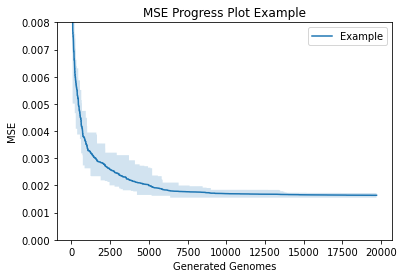

In [ ]:
#cla()  # Clear axis
#clf()  # Clear figure
#close() # Close a figure window

plt.cla()
plt.close()
generation = []
mse = []

for offset in [1,2,4,8]:
    for repeat in range(numRepeat):
        data = np.genfromtxt(resultDir+'/uniform_10_20/offset_{}/HEAT_RATE_LOSS_CALC/{}/fitness_log.csv'.format(offset, repeat), delimiter=',', skip_header=True, usecols=(0,4))[0:n]
        generation.append(data[:,0])
        mse.append(data[:,1])

    plt.plot(np.average(generation, axis = 0), np.average(mse, axis=0), label='offset {}'.)
    plt.fill_between(np.average(generation, axis = 0), np.min(mse, axis=0), np.max(mse, axis=0), alpha=.2)



plt.ylim([0.0,0.008])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Generated Genomes")
title = "MSE Progress Plot Example"
name = "plot_example"
plt.title(title)
plt.savefig(name + ".png",bbox_inches='tight')  

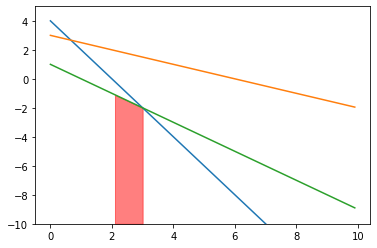

In [ ]:
x = np.arange(0,10,0.1)
  
# plotting the lines
a1 = 4 - 2*x
a2 = 3 - 0.5*x
a3 = 1 -x
  
# The upper edge of
# polygon
a4 = np.minimum(a1, a2)
  
# Setting the y-limit
plt.ylim(-10, 5)
  
# Plot the lines
plt.plot(x, a1,
        x, a2,
        x, a3)
  
# Filling between line a3 and line a4
#example a
# plt.fill_between(x, a3, a4, color='red', alpha=0.5)
#example b
plt.fill_between(x, a3, -10, where = (x > 2) & (x <= 3), color='red',alpha=0.5)

plt.show()